## Super Eenvoudig Model

In [44]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix

In [27]:
data = pd.read_csv('../data/raw/SalesKaggle3.csv')

In [28]:
data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


We preprocess the data, by encoding MarketingType (the only categorical variable we want to include) as a numerical variable.

In [77]:
def preproces_data(data, labelencoder_dict):
    data.loc[:,'MarketingTypeD'] = labelencoder_dict['MarketingTypeD'].transform(data.MarketingType)
    
#     data.loc[:,'weights'] = data.agg({'SoldFlag':['mean']}).values[0,0]
#     data.loc[data.SoldFlag == 1,'weights'] = 1 - data.agg({'SoldFlag':['mean']}).values[0,0]
    

In [71]:
labelencoder = {'MarketingTypeD': preprocessing.LabelEncoder().fit(historical.MarketingType)}

In [78]:
preproces_data(data, labelencoder)

In [80]:
historical = data[data.File_Type == 'Historical']
active = data[data.File_Type == 'Active']

In [81]:
active

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,MarketingTypeD,weights
75996,85107,Active,869734,NaN,NaN,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08,1,0.171009
75997,85108,Active,3741319,NaN,NaN,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00,1,0.171009
75998,85109,Active,3517789,NaN,NaN,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00,1,0.171009
75999,85110,Active,1455936,NaN,NaN,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81,1,0.171009
76000,85111,Active,2921480,NaN,NaN,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80,1,0.171009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,208023,Active,109683,NaN,NaN,D,7,1,2.101869e+05,72.87,2006,54,8.46,60.59,0,0.171009
198913,208024,Active,416462,NaN,NaN,D,8,1,4.555041e+05,247.00,2009,65,8.40,74.85,0,0.171009
198914,208025,Active,658242,NaN,NaN,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62,1,0.171009
198915,208026,Active,2538340,NaN,NaN,S,2,1,3.775266e+05,46.95,2001,23,27.42,37.89,1,0.171009


In [82]:
from sklearn.utils.class_weight import compute_class_weight

compute_class_weight('balanced', [0,1], historical.SoldFlag.values)

array([0.60314286, 2.92382271])

We select dependent and independent variables; SoldCount is ommited from the independent variables because the model misunderstands it as a predictor for future sales (where it is NaN). SKU number is omitted, because it is a serial number of the product and thus contains no added information.

We predict for SoldFlag.

In [53]:
x_cols = ['ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice',
       'MarketingTypeD']

y_col = 'SoldFlag'

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(historical[x_cols], historical[y_col].values, test_size=0.30, random_state=42)

In building the Random Forest classifier we add the argument `class_weight='balanced'` to improve performance; when omitting this, the model performs worse because the data is unbalanced.

In [97]:
clf = RandomForestClassifier(max_depth=5, random_state=42, criterion='gini', n_estimators=100, verbose=1, class_weight = 'balanced')

In [101]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

## Model Evaluation

In [50]:
def classifier_model_plot(X_test, y_test, clf, figsize, name):
    
    y_pred=clf.predict_proba(X_test)
    y_pred = y_pred[:,1]
    y_pred_labels=clf.predict(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)

    precision, recall, thresholds2 = precision_recall_curve(y_test, y_pred)

    feats = {} # a dict to hold feature_name: feature_importance

    for feature, importance in zip(X_test.columns, clf.feature_importances_):
        feats[feature] = importance #add the name/value pair 

    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    importances['sd'] = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    
    lw = 2

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False, figsize=figsize)

    ax1.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    ax1.axis(xmin=0,xmax=1.05, ymin=0, ymax=1.05)
    ax1.plot([-0.05, 1.05], [-0.05, 1.05], color='navy', lw=lw, linestyle='--')
    ax1.axis(xmin=0,xmax=1, ymin=0, ymax=1)
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Model ROC')
    ax1.legend(loc="lower right")

    confusion_matrix = plot_confusion_matrix(clf, X_test, y_test, normalize='pred', ax=ax2)
    ax2.set_title('Confusion Matrix')

    ax3.plot(precision, recall, color='darkorange',
             lw=lw, label='Precision Recall Curve')
    ax3.axis(xmin=0,xmax=1.05, ymin=0, ymax=1.05)
    ax3.set_xlabel('Precision')
    ax3.set_ylabel('Recall')
    ax3.set_title('Model PRC')
    ax3.legend(loc="lower right")

    textstr = '\n'.join((
        r'$Accuracy=%.2f$' % (accuracy_score(y_test, y_pred_labels), ),
        r'$Precision=%.2f$' % (precision_score(y_test, y_pred_labels), ),
        r'$Recall=%.2f$' % (recall_score(y_test, y_pred_labels), )))

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    ax3.text(0.10, 0.15, textstr, transform=ax3.transAxes, fontsize=14, bbox=props)



    importances.sort_values(by='Gini-importance').plot.bar(yerr = 'sd', rot=90, ax=ax4)
    ax4.set_title('Importance of Variables')
    
    fig.savefig(name)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


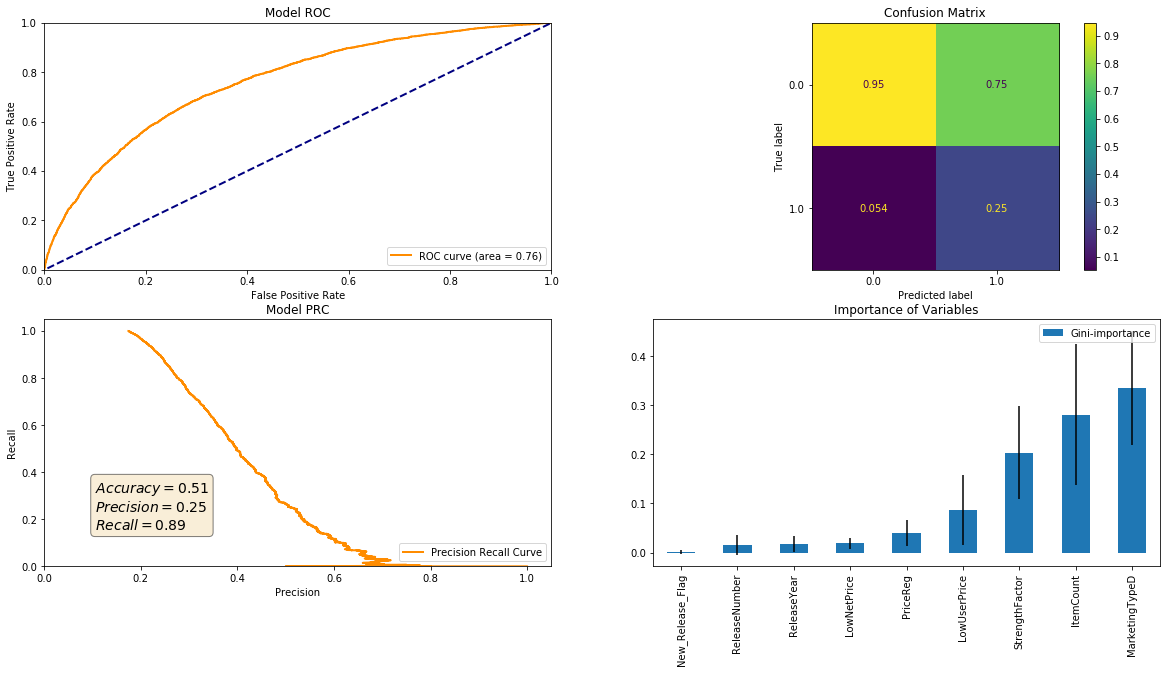

In [96]:
classifier_model_plot(X_test, y_test, clf, (20, 10), 'Modelplaatje.png')

## Save trained model for production use

In [98]:
import pickle

In [99]:
# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

In [107]:
clf.predict(X_test.iloc[23:24])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1.])

In [108]:
X_test.iloc[23:24]

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,MarketingTypeD
30115,5,1,412319.0,5.95,2007,74,48.99,4.58,0
